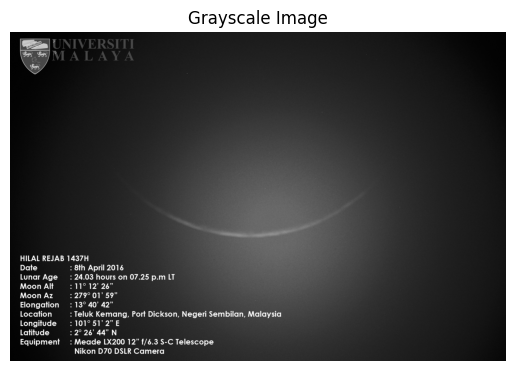

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (replace 'C:/Users/syazw/Downloads/lunar_image.jpg' with the correct path to your image)
image = cv2.imread(r'/content/1437 (b) Rejab 8.4.2016.jpg')

# Convert to grayscale for processing
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')  # Turn off axis if you want a cleaner display
plt.show()


import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('C:/Users/syazw/Downloads/lunar_image.png')

# Convert to grayscale for processing|
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display grayscale image (optional for debugging)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


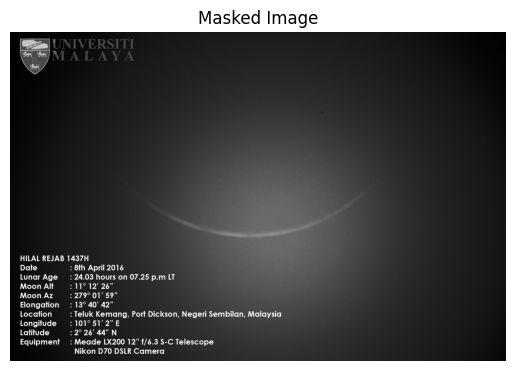

In [ ]:
# Convert image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color range to mask green background
lower_green = np.array([40, 40, 40])
upper_green = np.array([80, 255, 255])

# Create mask to exclude green areas
mask = cv2.inRange(hsv, lower_green, upper_green)
mask = cv2.bitwise_not(mask)  # Invert mask to highlight crescent

# Apply the mask to the grayscale image
masked_gray = cv2.bitwise_and(gray, gray, mask=mask)

# Display the masked image
plt.imshow(masked_gray, cmap='gray')
plt.title('Masked Image')
plt.axis('off')
plt.show()


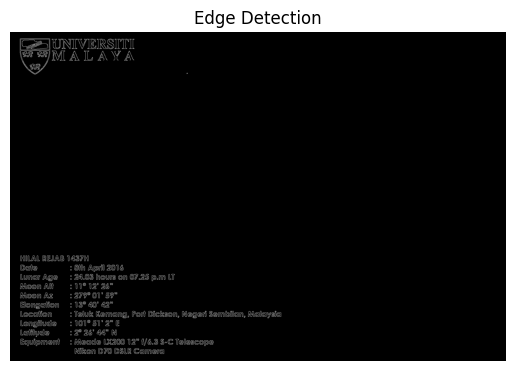

In [ ]:
# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(masked_gray, (5, 5), 0)

# Perform Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Display edges to verify
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')
plt.show()


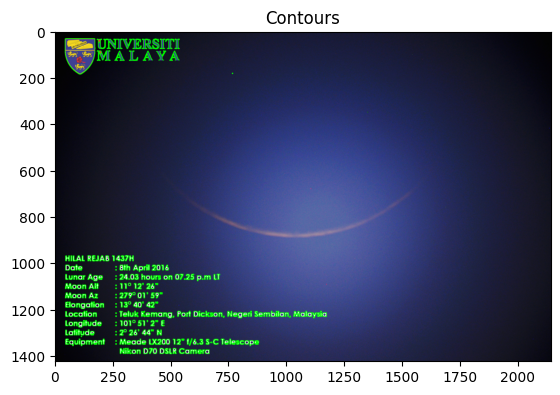

In [ ]:
# Find contours in the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Display contours to verify
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contours')
plt.show()


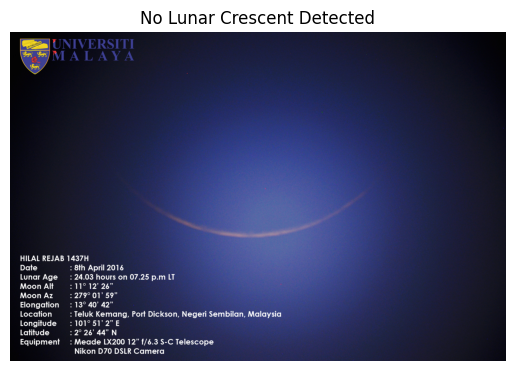

No lunar crescent detected.


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('/content/1437 (b) Rejab 8.4.2016.jpg')

# Convert to grayscale for processing
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert image to HSV color space for color masking
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color range to mask green background
lower_green = np.array([40, 40, 40])
upper_green = np.array([80, 255, 255])

# Create mask to exclude green areas
mask = cv2.inRange(hsv, lower_green, upper_green)
mask = cv2.bitwise_not(mask)  # Invert mask to highlight crescent

# Apply the mask to the grayscale image
masked_gray = cv2.bitwise_and(gray, gray, mask=mask)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(masked_gray, (5, 5), 0)

# Perform Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Flag to indicate detection status
crescent_detected = False

# Filter contours based on size and shape to detect crescent
for cnt in contours:
    area = cv2.contourArea(cnt)
    # Filter by area; adjust the range as needed based on your image
    if 1000 < area < 5000:
        crescent_detected = True
        # Optionally, draw the contour on the image
        cv2.drawContours(image, [cnt], -1, (0, 0, 255), 2)
        break

# Display the final result with detected crescent contour (if any)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lunar Crescent' if crescent_detected else 'No Lunar Crescent Detected')
plt.axis('off')
plt.show()

# Print the result
if crescent_detected:
    print("Lunar crescent detected!")
else:
    print("No lunar crescent detected.")
